In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

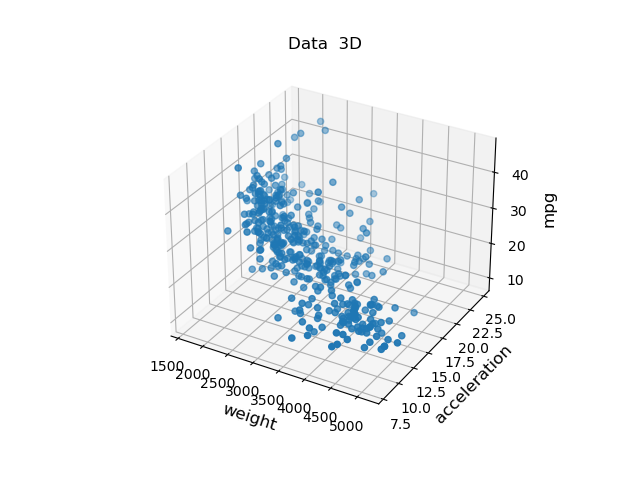

In [2]:
%matplotlib widget

dataset = pd.read_csv('auto-mpg.csv')
vary=0
var1=4
var2=5

x1 = dataset.iloc[:, var1].values #Feature matrix
x2 = dataset.iloc[:, var2].values #Criterion Matrix 
y = dataset.iloc[:, vary].values #Criterion Matrix 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(x1,x2,y)
plt.title("Data  3D ")


ax.set_xlabel(dataset.columns[var1], fontsize=12);
ax.set_ylabel(dataset.columns[var2], rotation=90, fontsize=12);
ax.set_zlabel(dataset.columns[vary], rotation=90, fontsize=12);

theta_0=22.900093, theta_1=-6.901228, theta_2=-0.019275, Cost=7232.489726, iterations: 3999


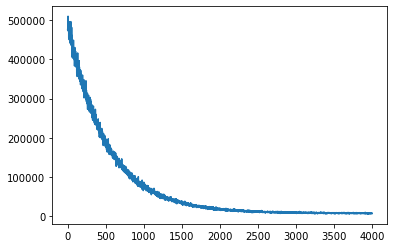

In [7]:
### Parameter initialization
%matplotlib inline
theta = np.array([[-10],[-10],[-10]])
ep=1e-8
lr =0.001
n_iter =4000
m = len(y)

j_cost_SGD= np.zeros([n_iter])

# Dataset shape
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(x1),1)),x1,x2]

#Standardization using z-score
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    med=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-med)/std
    

for it in range(n_iter):
    cost =0.0
    for i in range(m):
        rand_ind = np.random.randint(0,m)
        X_i = x_bs[rand_ind,:].reshape(1,x_bs.shape[1])
        y_i = y[rand_ind].reshape(1,1)
        prediction = np.dot(X_i,theta)
        residual=prediction- y_i
        theta = theta -(1/m)*lr*( X_i.T.dot((residual)))
        cost +=np.sum(np.square(residual))
    j_cost_SGD[it]=cost
    # if j_cost_SGD[it]<7318:  
    #     break;
   
print("theta_0=%f, theta_1=%f, theta_2=%f, Cost=%f, iterations: %d" %(theta[0],theta[1],theta[2],j_cost_SGD[it],it))
fig = plt.figure()
plt.plot(j_cost_SGD[0:it])
plt.show()

(209, 305)
(209, 305)
(209, 305)


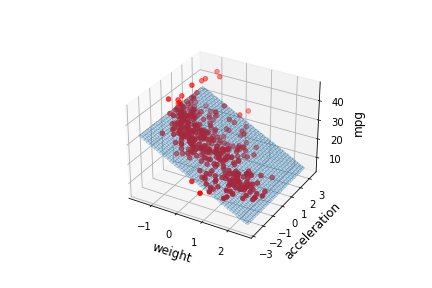

In [8]:
##Plane result 
%matplotlib widget
xx1 = np.arange(np.min(x_bs[:,1]), np.max(x_bs[:,1]), 0.02)
xx2 = np.arange(np.min(x_bs[:,2]), np.max(x_bs[:,2]), 0.02)
plane=np.zeros([len(xx1),len(xx2)])

for i in range(len(xx1)):
    for j in range(len(xx2)):
        plane[i,j]=np.dot(np.c_[1,xx1[i],xx2[j]],theta)
X1, X2 = np.meshgrid(xx1, xx2, indexing = 'ij')
print(X1.shape)
print(X2.shape)
print(plane.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1,X2, plane,
                       linewidth=0, antialiased=False,alpha=0.2)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel(dataset.columns[var1], fontsize=12);
ax.set_ylabel(dataset.columns[var2], rotation=90, fontsize=12);
ax.set_zlabel(dataset.columns[vary], rotation=90, fontsize=12);